## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。
- wine = datasets.load_wine()
- boston = datasets.load_boston()
- breast_cancer = datasets.load_breast_cancer()

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

In [43]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [34]:
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
print(f"Unique values in wine.target = {np.unique(wine.target)}")
np.bincount(wine.target)

Unique values in wine.target = [0 1 2]


array([59, 71, 48])

#### load_wine dataset is a 3-class classification problem

In [38]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 1.000


In [39]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [41]:
print(f"Unique values in wine.target = {np.unique(cancer.target)}")
np.bincount(cancer.target)

Unique values in wine.target = [0 1]


array([212, 357])

#### load_cancer dataset is a binary classification problem

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 0.947


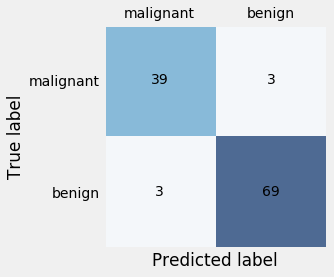

In [44]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, target_names=cancer.target_names)

In [45]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [53]:
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.3f}")

R^2 score = 0.635
Mean Square Error = 29.782


In [54]:
boston.target.mean(), boston.target.std()

(22.532806324110677, 9.188011545278203)

(-2.500399106002555, 52.50838122605365, -2.5, 52.5)

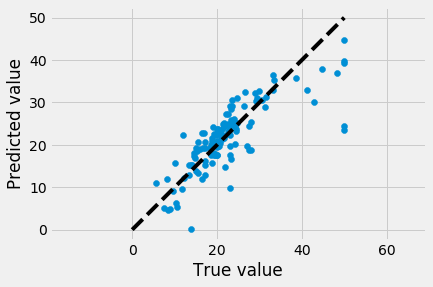

In [68]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], 'k--')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.axis('equal')